In [2]:
import gym
import gym_nav
import proplot as pplt
import matplotlib.pyplot as plt
from read_experiments import *

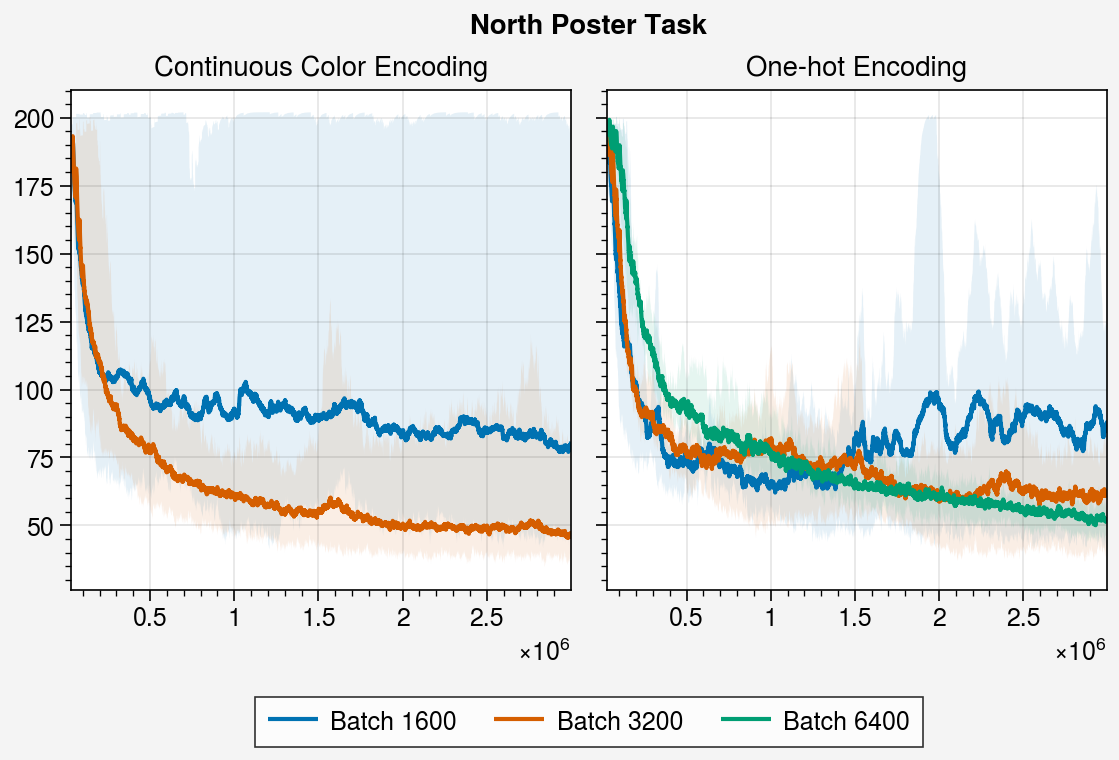

In [9]:
fig, ax = pplt.subplots(ncols=2)

batch_sizes = [16, 32, 64]
exps = ['nav_pnorth/nav_pdistal_batch{}auxnone', 'nav_pnorth/nav_pnorth_batch{}onehot']

for i, exp in enumerate(exps):
    lines = []
    for batch in batch_sizes:
        if i == 0 and batch == 64:
            continue
        lines.append(average_runs(exp.format(batch), 'length', ignore_first=100, ax=ax[i], label=f'Batch {batch*100}'))
        
ax.format(title=['Continuous Color Encoding', 'One-hot Encoding'], suptitle='North Poster Task')
fig.legend(lines, loc='b')

<a list of 1 Line2D objects>

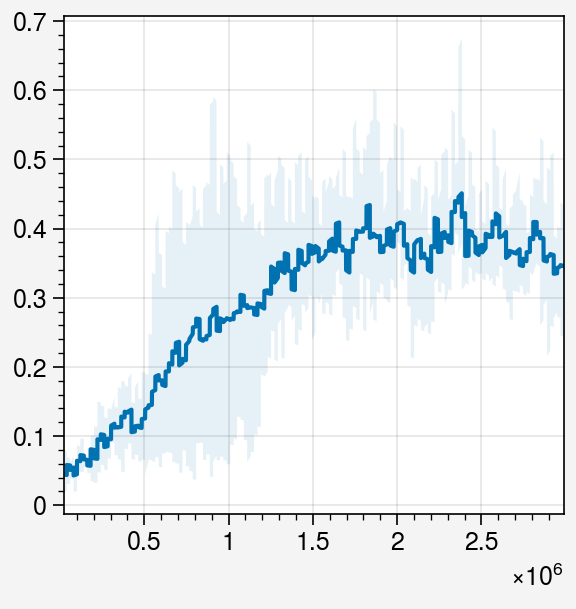

In [10]:
fig, ax = pplt.subplots()
average_runs('nav_4wallexplore/nav_4wallexplore_batch128onehot', ax=ax)

In [11]:
env_kwargs = {'num_objects': 0, 'rew_structure': 'goal',
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True}
